In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import os 
import numpy as np 
import cv2 

IMG_HEIGHT = 416
IMG_WIDTH = 416

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x "/content/train_data.rar" "/content/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/train_data.rar

Creating    /content/train_data                                       OK
Creating    /content/train_data/test                                  OK
Creating    /content/train_data/test/Absent                           OK
Extracting  /content/train_data/test/Absent/4_2_jpeg.rf.d22eb007ea25dcdb0924bc8e395fc6c4.jpg       2%  OK 
Creating    /content/train_data/test/Present                          OK
Extracting  /content/train_data/test/Present/2_3_jpeg.rf.5ebb1355181c5911a18896d3965d6018.jpg       5%  OK 
Extracting  /content/train_data/test/Present/2_4_jpeg.rf.b8dbec04b14be7151c24857ac68dc922.jpg       9%  OK 
Extracting  /content/train_data/test/Present/3_6_jpeg.rf.ecbc2e832c1f82b2e987084ac11ea2a0.jpg      13%  OK 
Extracting  /content/train_data/test/Present/4_5_jpeg.rf.f74333ce6d870b5ee0530d66357df155.jpg      16%  OK 
Extracting  /c

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [ ]:
train_images,train_labels = create_dataset('/content/train_data/train')
test_images,test_labels = create_dataset('/content/train_data/test')

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(train_labels))}


In [ ]:
target_dict

{'Absent': 0, 'Present': 1}

In [ ]:
train_labels =  [target_dict[train_labels[i]] for i in range(len(train_labels))]
test_labels =  [target_dict[test_labels[i]] for i in range(len(test_labels))]

In [ ]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
train_labels  = train_labels.reshape(-1,1)
test_labels  = test_labels.reshape(-1,1)
train_images = train_images.reshape(-1,416,416,3)
test_images = test_images.reshape(-1,416,416,3)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(416, 416, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 414, 414, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 207, 207, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 205, 205, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 102, 102, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 414, 414, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 207, 207, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 205, 205, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 102, 102, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 flatten_1 (Flatten)         (None, 640000)           

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1/1 [==============================] - 1s 734ms/step - loss: 0.3765 - accuracy: 0.8000 - val_loss: 0.5108 - val_accuracy: 0.8000
Epoch 2/20
1/1 [==============================] - 0s 175ms/step - loss: 0.5019 - accuracy: 0.8000 - val_loss: 0.3140 - val_accuracy: 0.9000
Epoch 3/20
1/1 [==============================] - 0s 158ms/step - loss: 0.4817 - accuracy: 0.8000 - val_loss: 0.2854 - val_accuracy: 0.8000
Epoch 4/20
1/1 [==============================] - 0s 153ms/step - loss: 0.2777 - accuracy: 0.8500 - val_loss: 0.3175 - val_accuracy: 0.8000
Epoch 5/20
1/1 [==============================] - 0s 161ms/step - loss: 0.2583 - accuracy: 0.9500 - val_loss: 0.2991 - val_accuracy: 0.8000
Epoch 6/20
1/1 [==============================] - 0s 161ms/step - loss: 0.2294 - accuracy: 0.9500 - val_loss: 0.3091 - val_accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 0s 153ms/step - loss: 0.1979 - accuracy: 0.9500 - val_loss: 0.3274 - val_accuracy: 0.8000
Epoch 8/20
1/1 [====

1/1 - 0s - loss: 0.4139 - accuracy: 0.8000 - 47ms/epoch - 47ms/step


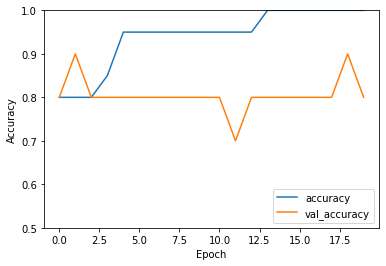

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
model.save("attendence_check.h5")

In [ ]:
!cp /content/attendence_check.h5 /content/drive/My\ Drive/